In [1]:
import os
import subprocess
import numpy as np
import nibabel as nib
import scipy.misc as m
import matplotlib.pyplot as plt
import pandas as pd
import tensorlayer as tl

C:\Users\Nassim\Anaconda3\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)
C:\Users\Nassim\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
data = ['10_left.jpeg', '17_right.jpeg', '15_right.jpeg', '10015_right.jpeg','16_left.jpeg']

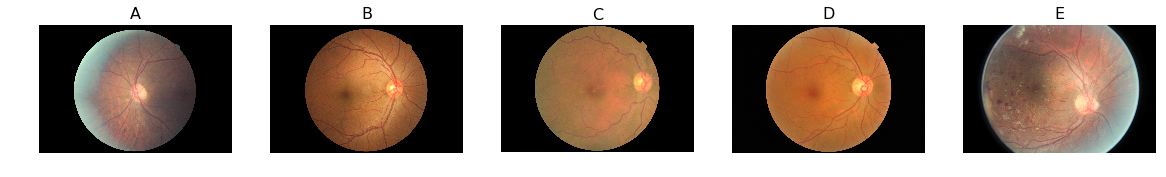

In [11]:
fig = plt.figure(figsize=(20,20))
alphabet = ['A','B','C','D','E']
for i in range(5):
    ax = fig.add_subplot(1,5,i+1)
    ax.axis('off')
    ax.set_title(alphabet[i],size = 16)
    ax.imshow(plt.imread(os.path.join('D:/train/',data[i])))
          
plt.show() 

In [6]:
data = pd.read_csv('E:/Data/trainLabels.csv')
files = tl.files.load_file_list(path="D:/train/", regx='.*.jpeg',printable=False)
files1 = tl.files.load_file_list(path="D:/train1/", regx='.*.jpeg',printable=False)
files = [os.path.splitext(p)[0] for p in files]
files1 = [os.path.splitext(p)[0] for p in files1]
count = 0
data_label = []
for i in data['image']:
    for j in files:
        if(i == j):
            data_label.append(data['level'][count])
    count+=1 
count = 0
data_label1 = []
for i in data['image']:
    for j in files1:
        if(i == j):
            data_label1.append(data['level'][count])
    count+=1 
labels = [0,1,2,3,4]
name_labels = ['No DR','Mild DR','Moderate DR','Severe DR','Proliferative DR']
count = 0
compter = []
for i in labels:
    count = 0
    for j in data_label:
        if(i == j):
            count+=1
    compter.append(count)
compter1 = []
for i in labels:
    count = 0
    for j in data_label1:
        if(i == j):
            count+=1
    compter1.append(count)
compter = [x + y for x, y in zip(compter, compter1)]

In [7]:
compter

[12386, 1130, 2536, 424, 324]

In [8]:
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(name_labels))
    colours = ['#1F77B4','#FF7F0E','#2CA02C','#D62728','#9467BD']
    plt.figure(figsize=(15,8))
    label = [compter[0],compter[1],compter[2],compter[3],compter[4]]
    for i in range(len(index)):
        plt.bar(index[i], compter[i],align='center', alpha=0.5,color = colours[i])
        plt.text(x = index[i]-0.1 , y = compter[i]+100, s = label[i], size = 12)
    plt.legend(name_labels)
    plt.xlabel('Level', fontsize=2, size = 20)
    plt.ylabel('Number of Records', fontsize=5,size = 20)
    plt.xticks(index, name_labels, fontsize=5,size = 16, color = 'gray')
    plt.title('Level of DR vs Frequency', size = 22)
    plt.grid(linewidth = 0.2)
    
    plt.show()

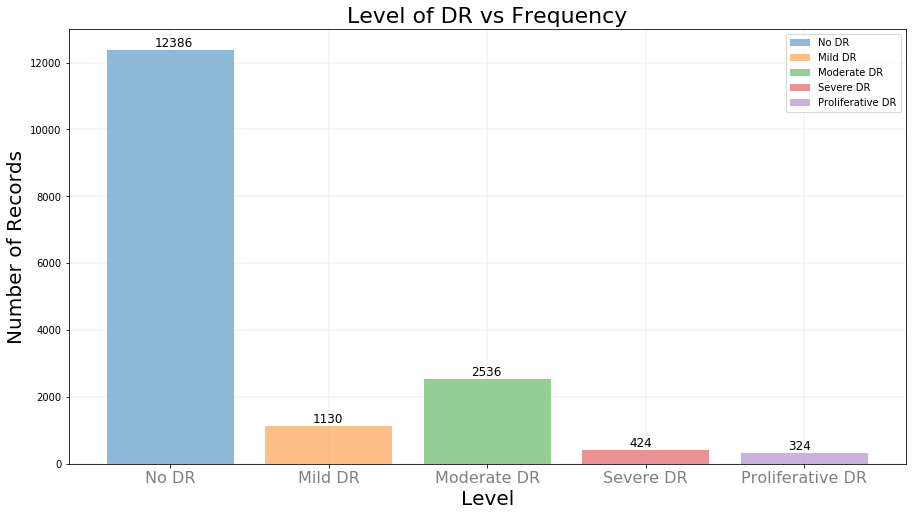

In [9]:
plot_bar_x()

In [11]:
data = pd.read_csv('D:/trainLabels_master_256_v2.csv')['level']
data1 = pd.read_csv('D:/trainLabels_master_256_v21.csv')['level'] 
labels = [0,1,2,3,4]
name_labels = ['No DR','Mild DR','Moderate DR','Severe DR','Proliferative DR']
count = 0
compter = []
for i in labels:
    count = 0
    for j in data:
        if(i == j):
            count+=1
    compter.append(count)
count = 0
compter1 = []
for i in labels:
    count = 0
    for j in data1:
        if(i == j):
            count+=1
    compter1.append(count)
compter = [x + y for x, y in zip(compter, compter1)]

In [12]:
compter

[24472, 6762, 15018, 2514, 1944]

In [13]:
def plot_bar_x_b():
    # this is for plotting purpose
    index = np.arange(len(name_labels))
    colours = ['#1F77B4','#FF7F0E','#2CA02C','#D62728','#9467BD']
    plt.figure(figsize=(12,8))
    label = [compter[0],compter[1],compter[2],compter[3],compter[4]]
    for i in range(len(index)):
        plt.bar(index[i], compter[i],align='center', alpha=0.5,color = colours[i])
        plt.text(x = index[i]-0.1 , y = compter[i]+100, s = label[i], size = 12)
    plt.legend(name_labels)
    plt.xlabel('Level', fontsize=2, size = 20)
    plt.ylabel('Number of Records', fontsize=5,size = 20)
    plt.xticks(index, name_labels, fontsize=5,size = 16, color = 'gray')
    plt.title('Level of DR vs Frequency (Balanced Classes)', size = 22)
    plt.grid(linewidth = 0.2)
    
    plt.show()

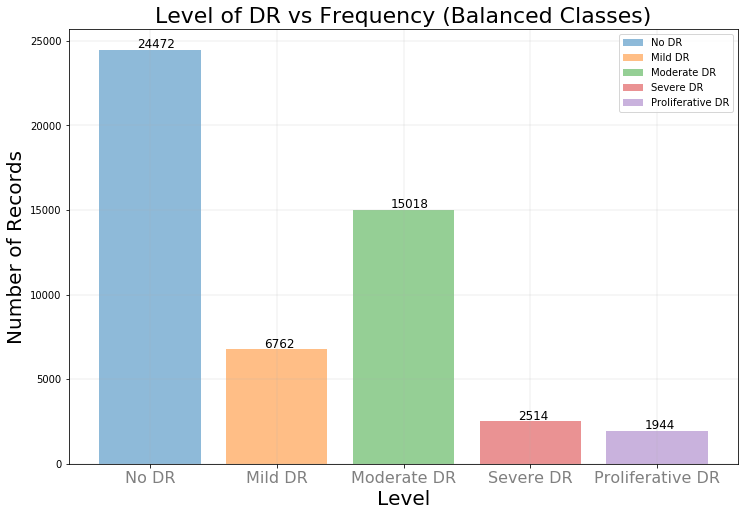

In [14]:
plot_bar_x_b()